# A Helpful Class to Interface With the Patient Data
Based off of Pandas Dataframes

In [1]:
from Patient import Patient
from Database import Database

## Database Interface:
Database Methods deal with database-wide searches, meaning they are functions that are not specific for a single patient.
# Initialize Database

In [3]:
d = Database()

Connect To Database


username: ········
encryption key: ········


### 1. fetch_mrns()
Return a list of all the mrns found in the database


In [4]:
d.fetch_mrns()

['111111', '222222', '333333', '444444']

### 2. search_name
MRN Lookup by Name.  Case-insensitive


In [5]:
d.search_name()

,fname,lname
mrn,,
111111,John1,NaN
444444,Jane4,NaN


In [6]:
#Can specify last name 
d.search_name(last_name = "Smith2")

KeyError: "None of [Float64Index([nan, nan], dtype='float64')] are in the [columns]"

In [ ]:
#Specify First Name 
d.search_name(first_name = "john")

In [ ]:
#Or Both
d.search_name(first_name = "john", last_name = "doe")

### 3. search()
Lookup by tag.  Returns all data that matches a given tag.  CASE-SENSITIVE

In [7]:
d.search("diagnosis")

,value
333333,C61;Malignant_neoplasm_of_prostate


In [8]:
d.search("dob")

,date
111111,1948-10-28
333333,1965-10-18


## Patient Interface
A simplistic way to retrieve the data for each patient

In [10]:
p = Patient()

Connect To Database


username: ········
encryption key: ········


In [11]:
mrn = 222222
p.load_mrn(mrn)
#lists all the attributes related to the patient with mrn 333333
p.attributes

['mrn']

In [17]:
mrn = 222222
p.load_mrn(mrn)
#lists all the attributes related to the patient with mrn 333333
p.attributes

['c61.psa', 'c61.surgery', 'diagnosis', 'mrn']

In [18]:
#prints out all data relating to this patient
p

MRN: 222222

c61.psa:
    psa        date   unit
0  0.28  2019-02-21  ng/mL

c61.surgery:
         date        surgery
0  2009-01-01  prostatectomy

diagnosis:
C61;Malignant_neoplasm_of_prostate

mrn:
222222


## Pandas-like Indexing

In [19]:
#Two ways to index. This is the first way.
p.last_name

AttributeError: 'Patient' object has no attribute 'last_name'

In [20]:
#Second way to index
p["c61.psa"]

,psa,date,unit
0,0.28,2019-02-21,ng/mL


In [21]:
#multi index.
fname, lname, dob = p["first_name", "last_name", "dob"]
print(fname)
print(lname)
print(dob)

AttributeError: 'Patient' object has no attribute 'first_name'

## Example Use Case: PSA time series

In [22]:
p = Patient(222222)
p["c61.psa"]

TypeError: Patient.__init__() takes 1 positional argument but 2 were given

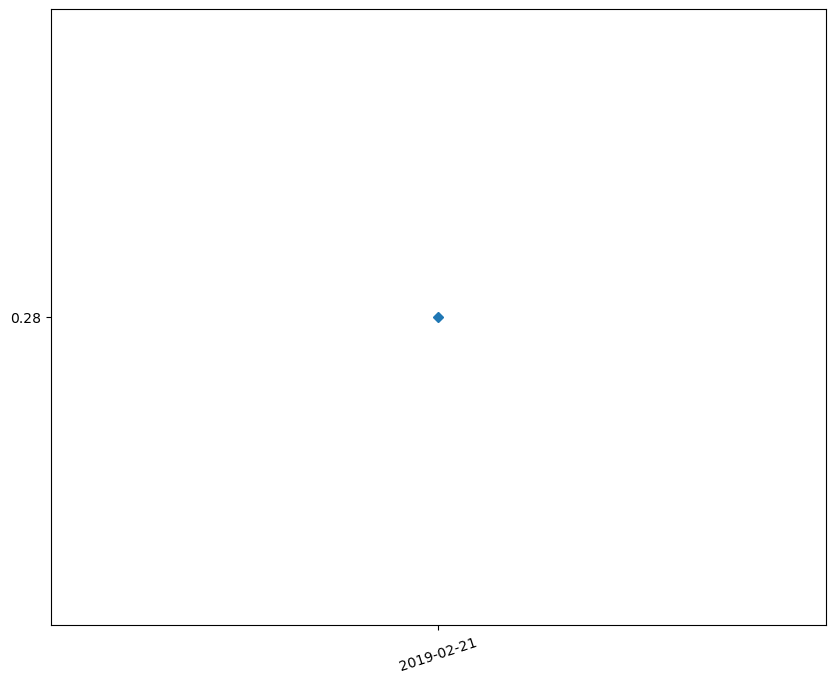

In [23]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
ax.tick_params(axis='x', labelrotation = 18)

df = p["c61.psa"]
df= df.sort_values(by = "date")
ax.plot(df["date"], df["psa"], marker = "D", linewidth = 2, markersize = 5)


## One Last Method(For Debugging)

In [24]:
help(p.rawdata)
p.rawdata("c61.psa")

Help on method rawdata in module Patient:

rawdata(attribute) method of Patient.Patient instance
    Input: attribute -> Output: data for that attribute in a list of dictionaries. 
    The data returned is exactly how it is stored in the SQL database.
    For example: [{'date': '2023-01-04', 'color': 'blue'}, {'date': '2023-01-12', 'color': 'green'}]
    The rationale for the existence of this method is twofold.
    1. There is a bug in setting an attribute due to a weird data entry or something else.
    2. It is hard to access a single cell of data in a DataFrame.  A dictionary is a lot easier.



[{'psa': '0.28', 'date': '2019-02-21', 'unit': 'ng/mL'}]